# HLA class I supertype classification
Classify HLA class I alleles into supertypes based on binding groove structure similarity

Author: Shawn Shen\
Created on: July 2022

In [1]:
from src.SupertypeTools import CGCalcMat, dist_heatmap, SSE, hierarchical_cluster, Silhouette, correlation, Tuning_N
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

## 1. Comparing Structure distance with peptide binding specificity distance

In [2]:
# Residue similarity matrix
SimMtx = "Grantham" # choose from ["Grantham", "SM_THREAD_NORM", "PMBEC"]

# Shape parameters
sigma = 0.1
k = 4

# Peptide binding speficity distances predicted by NetMHCpan4.1
BA_Mat_all = pd.read_csv("Computed_DistMtx/top10_matrix.csv", index_col=0)

### HLA-A

HLA-A structure distance matrix


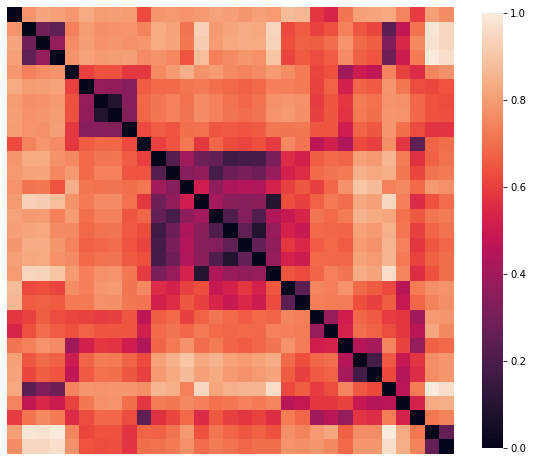

HLA-A peptide binding specificity distance matrix


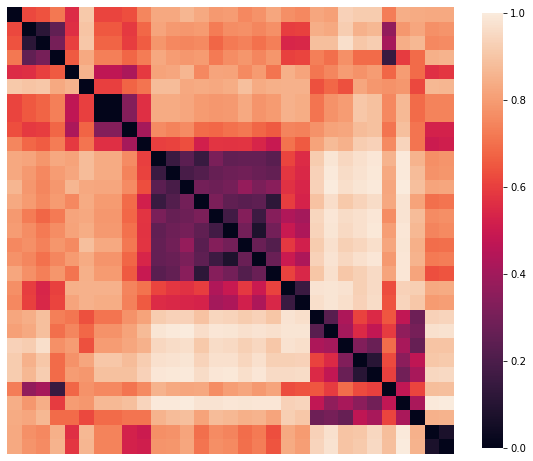

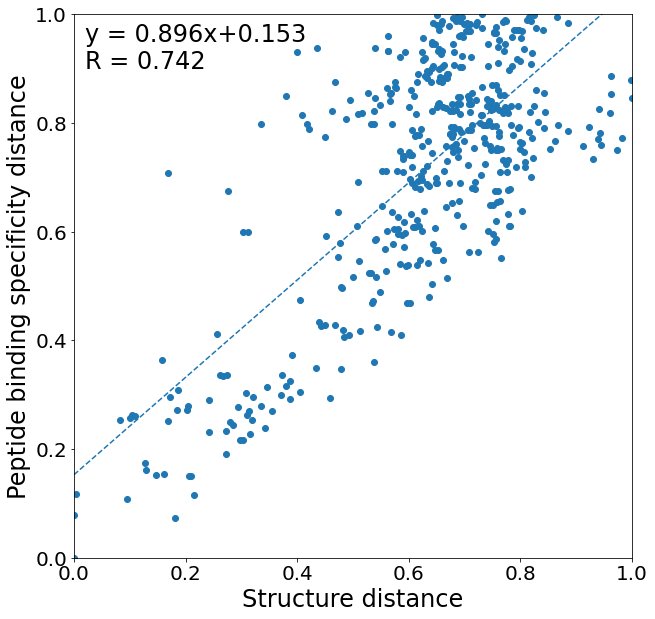

(0.895637559832461, 0.15279344962249242, 0.7421842494326203)

In [3]:
A_order = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]
A_label = ['A*01:01', 'A*26:01', 'A*26:02', 'A*26:03', 'A*29:02', 'A*30:01', 'A*30:02', 'A*30:03', 'A*30:04', 'A*32:01', 
'A*02:01', 'A*02:02', 'A*02:03', 'A*02:04', 'A*02:05', 'A*02:06', 'A*02:07', 'A*02:14', 'A*02:17', 'A*68:02', 'A*69:01', 
'A*03:01', 'A*11:01', 'A*31:01', 'A*33:01', 'A*33:03', 'A*66:01', 'A*68:01', 'A*74:01', 'A*23:01', 'A*24:02']

AMat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-A.list", sigma=sigma, k=k, Standardize=True)

print("HLA-A structure distance matrix")
dist_heatmap(AMat, order=A_order, line=False, shrink=0.8, labelsize=24, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
print("HLA-A peptide binding specificity distance matrix")
dist_heatmap(BA_Mat_all, order=A_order, line=False, shrink=0.8, labelsize=24, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
correlation(AMat, BA_Mat_all, A_order)

### HLA-B

HLA-B structure distance matrix


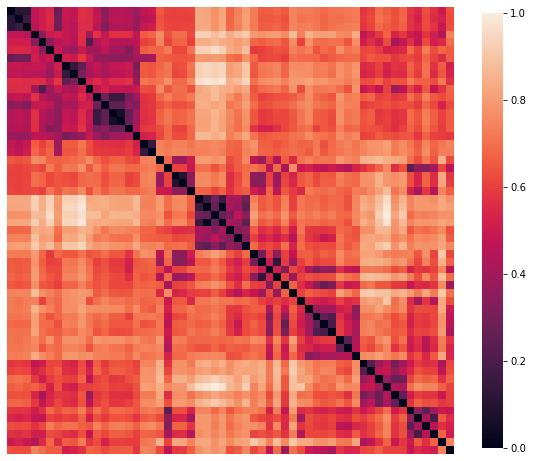

HLA-B peptide binding specificity distance matrix


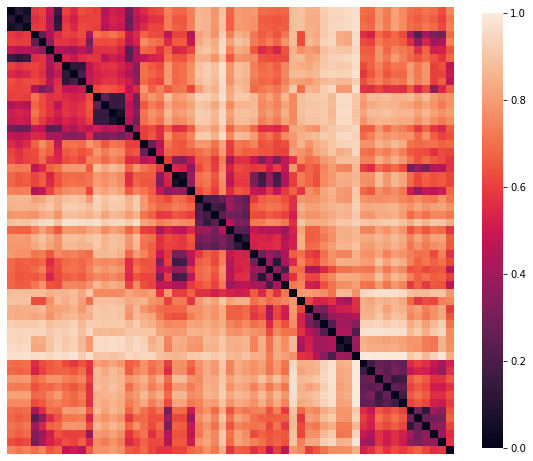

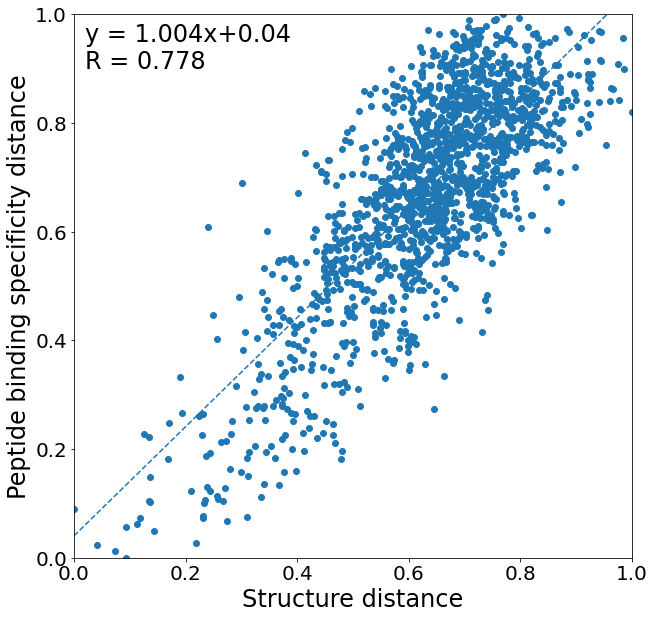

(1.0040740331860991, 0.04027561527473611, 0.7779303775859878)

In [4]:
B_order = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
B_label = ['B*07:02','B*07:03','B*07:05','B*15:08','B*35:01','B*35:03','B*42:01','B*51:01','B*51:02','B*51:03','B*53:01','B*54:01','B*55:01','B*55:02',
'B*56:01','B*67:01','B*78:01','B*08:01','B*08:02','B*14:02','B*15:03','B*15:09','B*15:10','B*15:18','B*27:02','B*27:03','B*27:04','B*27:05','B*27:06',
'B*27:07','B*27:09','B*38:01','B*39:01','B*39:02','B*39:09','B*48:01','B*73:01','B*18:01','B*37:01','B*40:01','B*40:02','B*40:06','B*44:02','B*44:03',
'B*45:01','B*15:16','B*15:17','B*57:01','B*57:02','B*58:01','B*58:02','B*15:01','B*15:02','B*15:12','B*15:13','B*46:01','B*52:01']

BMat = CGCalcMat("HLA1_models/CG_DAT",SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-B.list", sigma=sigma,k=k, Standardize=True)

print("HLA-B structure distance matrix")
dist_heatmap(BMat, order=B_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
print("HLA-B peptide binding specificity distance matrix")
dist_heatmap(BA_Mat_all, order=B_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])

correlation(BMat, BA_Mat_all, B_order)

### HLA-C

HLA-C structure distance matrix


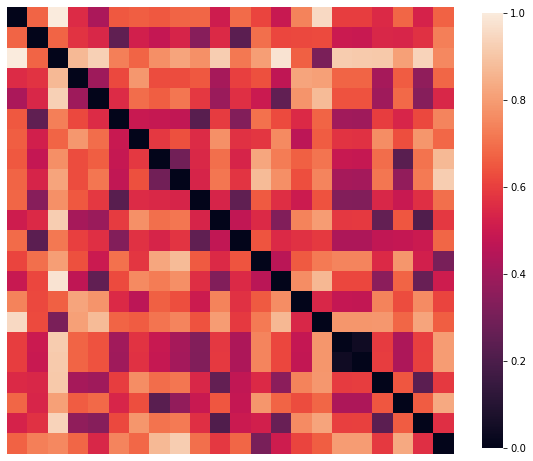

HLA-C peptide binding specificity distance matrix


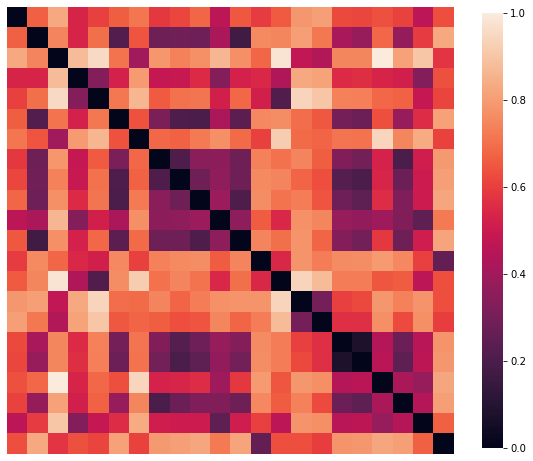

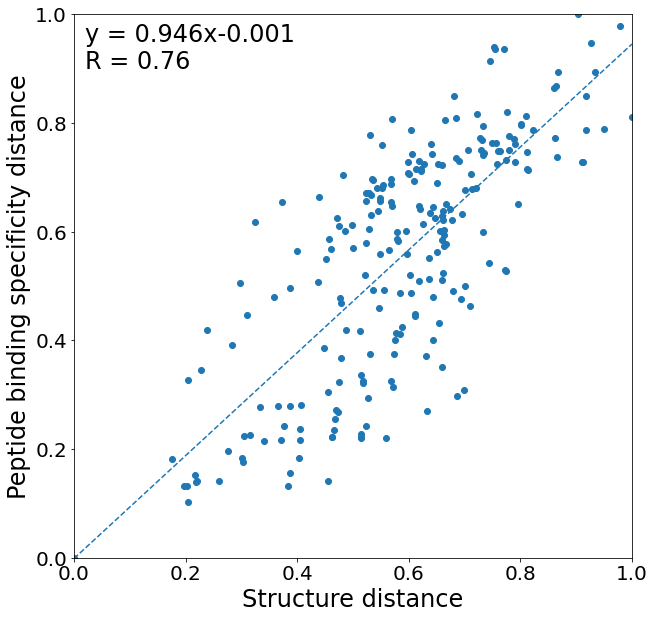

(0.9464376128968223, -0.0013872340080645085, 0.7603154265031986)

In [5]:
C_order = [
    ['C01_02','C03_02','C07_02','C08_01','C08_02','C12_02','C14_02','C16_01','C16_04'],
    ['C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
]
C_label = ['C*01:02','C*03:02','C*07:02','C*08:01','C*08:02','C*12:02','C*14:02','C*16:01','C*16:04','C*02:02','C*03:07','C*03:15',
'C*04:01','C*05:01','C*06:02','C*07:07','C*12:04','C*12:05','C*15:02','C*16:02','C*17:01','C*18:01']

CMat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/ReferencePanel-C.list", sigma=sigma, k=k, Standardize=True)

print("HLA-C structure distance matrix")
dist_heatmap(CMat, order=C_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
print("HLA-C peptide binding specificity distance matrix")
dist_heatmap(BA_Mat_all, order=C_order, line=False, shrink=0.8, labelsize=12, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])

correlation(CMat, BA_Mat_all, C_order)

## 2. Clustering performance comparing to previous studies

### Calculate Sum of Sequared Variance and Silhouette coefficient

In [6]:
# Sidney
A_Sidney = [
    ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A30_02', 'A30_03', 'A30_04', 'A32_01'],
    ['A30_01'],
    ['A29_02'],
    ['A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01'],
    ['A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01'],
    ['A23_01', 'A24_02']
    ]

# Doytchinova
A_Doytchinova = [
    ['A01_01','A29_02','A30_01','A30_02','A30_03','A30_04','A32_01','A03_01','A11_01','A31_01','A33_01','A33_03','A66_01','A68_01','A74_01'],
    ['A26_01','A26_02','A26_03','A02_01','A02_02','A02_03','A02_04','A02_05','A02_06','A02_07','A02_14','A02_17','A68_02','A69_01'],
    ['A23_01','A24_02']
]
# elbow_plot(Mat, BA_Mat)
ASidney_SSE = SSE(BA_Mat_all, A_Sidney)
ADoytchinova_SSE = SSE(BA_Mat_all, A_Doytchinova)

ASidney_Silhouette = Silhouette(BA_Mat_all, A_Sidney)
ADoytchinov_Silhouette = Silhouette(BA_Mat_all, A_Doytchinova)

ASSE_struct, ASSE_BA, ASilhouette_struct, ASilhouette_struct_BA = Tuning_N(AMat, BA_Mat_all, 1, 12)

In [7]:
# Sidney
B_Sidney = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01'],
    ['B08_01','B08_02'],
    ['B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01'],
    ['B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01'],
    ['B15_16','B15_17','B57_01','B57_02','B58_01','B58_02'],
    ['B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
    ]
# Doytchinova
B_Doytchinova = [
    ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01','B08_01','B14_02','B15_09','B15_10','B15_18','B39_01','B39_09','B73_01','B18_01','B15_02'],
    ['B51_01','B51_02','B51_03','B53_01','B08_02','B27_02','B38_01','B44_02','B44_03','B57_01','B57_02','B58_01','B58_02','B52_01'],
    ['B15_03','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B39_02','B48_01','B37_01','B40_01','B40_02','B40_06','B45_01','B15_16','B15_17','B15_01','B15_12','B15_13','B46_01']
]

BSidney_SSE = SSE(BA_Mat_all, B_Sidney)
BDoytchinova_SSE = SSE(BA_Mat_all, B_Doytchinova)

BSidney_Silhouette = Silhouette(BA_Mat_all, B_Sidney)
BDoytchinov_Silhouette = Silhouette(BA_Mat_all, B_Doytchinova)

BSSE_struct, BSSE_BA, BSilhouette_struct, BSilhouette_struct_BA = Tuning_N(BMat, BA_Mat_all, 1, 12)

In [8]:
# Doytchinova
C_Doytchinova = [
    ['C01_02','C03_02','C07_02','C08_01','C12_02','C14_02','C16_01','C16_04'],
    ['C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
]
CDoytchinova_SSE = SSE(BA_Mat_all, C_Doytchinova)

CDoytchinov_Silhouette = Silhouette(BA_Mat_all, C_Doytchinova)

CSSE_struct, CSSE_BA, CSilhouette_struct, CSilhouette_struct_BA = Tuning_N(CMat, BA_Mat_all, 1, 12)

In [9]:
# Use random clustering as baseline model
import random
import numpy as np

A_ref_alleles = ['A01_01', 'A26_01', 'A26_02', 'A26_03', 'A29_02', 'A30_01', 'A30_02', 'A30_03', 'A30_04', 'A32_01',
'A02_01', 'A02_02', 'A02_03', 'A02_04', 'A02_05', 'A02_06', 'A02_07', 'A02_14', 'A02_17', 'A68_02', 'A69_01',
'A03_01', 'A11_01', 'A31_01', 'A33_01', 'A33_03', 'A66_01', 'A68_01', 'A74_01',
'A23_01', 'A24_02']
B_ref_alleles = ['B07_02','B07_03','B07_05','B15_08','B35_01','B35_03','B42_01','B51_01','B51_02','B51_03','B53_01','B54_01','B55_01','B55_02','B56_01','B67_01','B78_01',
'B08_01','B08_02',
'B14_02','B15_03','B15_09','B15_10','B15_18','B27_02','B27_03','B27_04','B27_05','B27_06','B27_07','B27_09','B38_01','B39_01','B39_02','B39_09','B48_01','B73_01',
'B18_01','B37_01','B40_01','B40_02','B40_06','B44_02','B44_03','B45_01',
'B15_16','B15_17','B57_01','B57_02','B58_01','B58_02',
'B15_01','B15_02','B15_12','B15_13','B46_01','B52_01']
C_ref_alleles = ['C01_02','C03_02','C07_02','C08_01','C08_02','C12_02','C14_02','C16_01','C16_04',
'C02_02','C03_07','C03_15','C04_01','C05_01','C06_02','C07_07','C12_04','C12_05','C15_02','C16_02','C17_01','C18_01']
ALL_REF = [A_ref_alleles, B_ref_alleles, C_ref_alleles]

RAND_BA_SSE = []
RAND_BA_Silhouette = []
for ref_alleles in ALL_REF:
    mean_sse = []
    std_sse = []
    mean_silhouette = []
    std_silhouette = []

    for i in range(1, 13):
        n_cluster_sse = []
        n_cluster_silhouette = []
        for _ in range(5):
            random.shuffle(ref_alleles)
            rand_split = np.array_split(ref_alleles, i)
            # print(len(rand_split), ref_alleles)
            # breakpoint()
            n_cluster_sse.append(SSE(BA_Mat_all, rand_split))
            n_cluster_silhouette.append(Silhouette(BA_Mat_all, rand_split))
        mean_sse.append(np.mean(n_cluster_sse))
        std_sse.append(np.std(n_cluster_sse))

        mean_silhouette.append(np.mean(n_cluster_silhouette))
        std_silhouette.append(np.std(n_cluster_silhouette))

    RAND_BA_SSE.append((mean_sse, std_sse))
    RAND_BA_Silhouette.append((mean_silhouette, std_silhouette))

In [10]:
# Clustering of BA matrix directly as best performance
BA_SSE = []
BA_Silhouette = []
for ref_alleles in ALL_REF:
    # mean_sse = []
    # mean_silhouette = []
    BA_ref_Mat = BA_Mat_all.loc[ref_alleles][ref_alleles]
    SSE_BA, _, Silhouette_BA, _ = Tuning_N(BA_ref_Mat, None, 1, 12, StructSilhouette=True, BASilhouette=False)

    BA_SSE.append(SSE_BA)
    BA_Silhouette.append(Silhouette_BA)

### Elbow plot

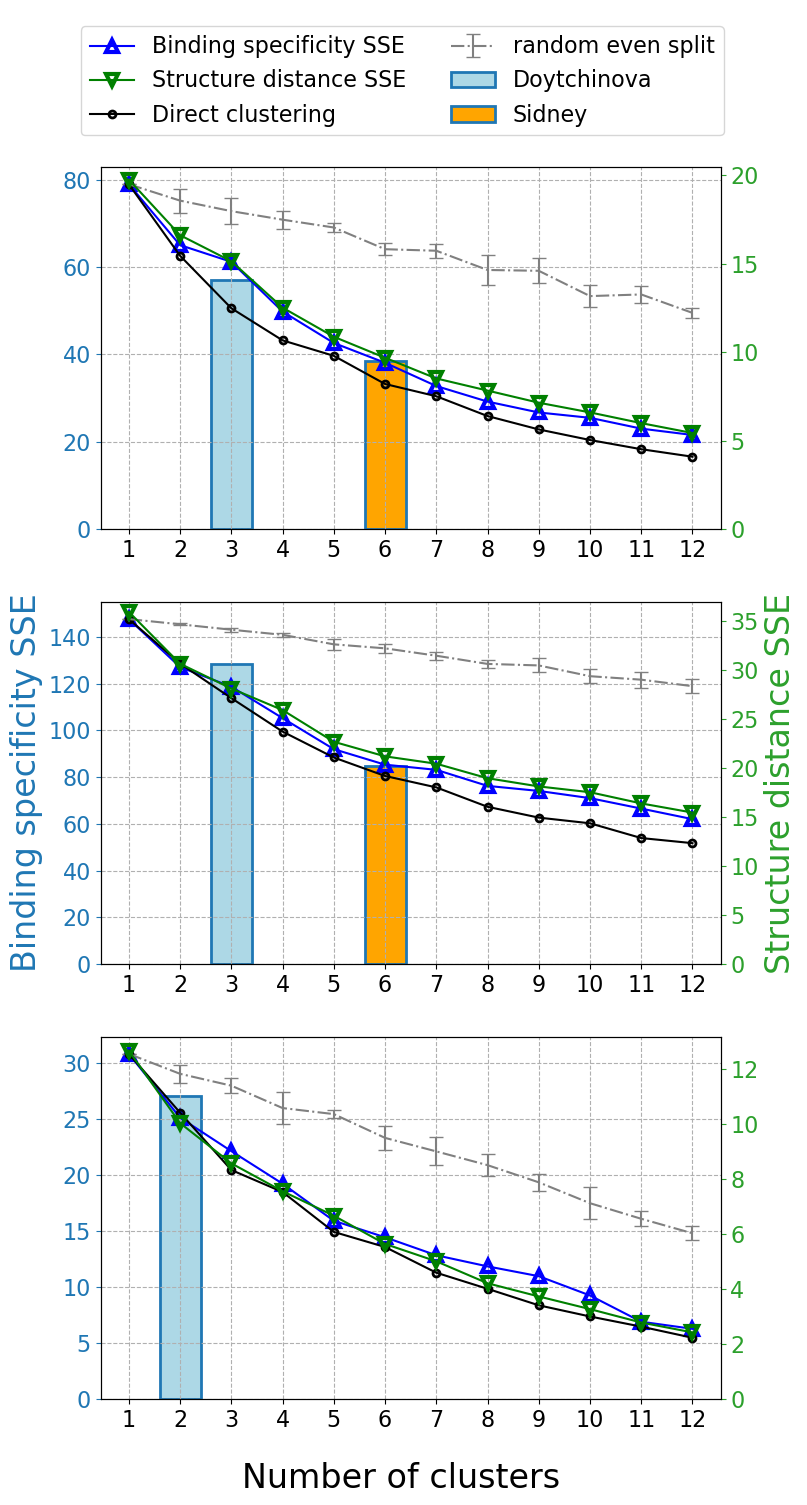

In [11]:
SSE_BA_list = [ASSE_BA, BSSE_BA, CSSE_BA]
SSE_struct_list = [ASSE_struct, BSSE_struct, CSSE_struct]
SSE_other = [((len(A_Doytchinova),ADoytchinova_SSE, "Doytchinova"), (len(A_Sidney),ASidney_SSE, "Sidney")), 
((len(B_Doytchinova),BDoytchinova_SSE, "Doytchinova"), (len(B_Sidney),BSidney_SSE, "Sidney")), 
((len(C_Doytchinova),CDoytchinova_SSE, "Doytchinova"),)]

xx = range(1, 13)
plt.style.use('default')
fig, axes = plt.subplots(3, 1, figsize=(8,16))
i=1
for ax1, SSE_BA, SSE_struct, SSE_random, SSE_BABA, Additional_Bar_group in zip(axes, SSE_BA_list, SSE_struct_list, RAND_BA_SSE, BA_SSE, SSE_other):
# for ax1, SSE_BA, SSE_struct, Additional_Bar_group in zip(axes, SSE_BA_list, SSE_struct_list, SSE_other):
    ax2 = ax1.twinx()

    # line plots
    line1, = ax1.plot(xx, SSE_BA, c='b', marker='^', mfc='None', mec='b', ms='8', mew=3, alpha=1, label="Binding specificity SSE")
    line2, = ax2.plot(xx, SSE_struct, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, alpha=1, label="Structure distance SSE")


    # random splits
    randoms = ax1.errorbar(xx, SSE_random[0], yerr=SSE_random[1], alpha=1, ls='-.', capsize=5, color='gray', label="random even split")
    line3, = ax1.plot(xx, SSE_BABA, c='k', marker='o', mfc='None', mec='k', ms='5', mew=2, alpha=1, label="Binding specificity SSE on BA")

    # ax1.set_xlabel('Number of clusters', fontsize=20)
    ax1.set_xticks(range(1,13,1))
    ax1.tick_params(axis='x', labelsize=16)

    if i == 2:
        lines = []
        labels = []
        lines.append(line1)
        labels.append("Binding specificity SSE")
        lines.append(line2)
        labels.append("Structure distance SSE")
        lines.append(line3)
        labels.append("Direct clustering")
        lines.append(randoms)
        labels.append("random even split")

        ax1.set_ylabel('Binding specificity SSE', color='tab:blue', fontsize=24)
        ax2.set_ylabel('Structure distance SSE', color='tab:green', fontsize=24)
    

    ax1.tick_params(axis='y', colors='tab:blue', labelsize=16)
    ax2.tick_params(axis='y', colors='tab:green', labelsize=16)
    ax2.set_ylim([0,None])

    # bar plots
    for group, color in zip(Additional_Bar_group, ["lightblue","orange"]):
        # print(group)
        # lines.append(ax1.bar(group[0], group[1], alpha=0.6, label=group[2], linewidth=2, edgecolor='b'))
        # labels.append(f"{group[2]} (n={group[0]})")
        bar = ax1.bar(group[0], group[1], color=color, label=group[2], linewidth=2, edgecolor='tab:blue')

        if i == 2:
            lines.append(bar)
            labels.append(group[2])

    # ax1.legend(lines, labels, prop={"size":16}, loc=1)
    ax1.grid(linestyle='--')
    i += 1

fig.legend(lines, labels, prop={"size":16}, loc=(0.1,0.91), ncol=2)
fig.supxlabel("Number of clusters", fontsize=24, y=0.05)

plt.show()

## All HLA I alleles

In [13]:
Mat = CGCalcMat("HLA1_models/CG_DAT", SimMtx=SimMtx, AlleleListFile="Dataset_split/All_alleles.list",sigma=sigma, k=k)
Mat.to_csv("HLA-I.csv")
Mat = pd.read_csv("HLA-I.csv", index_col=0)

SSE_struct, _, SilhouetteScore, _ = Tuning_N(Mat, None, 1, 30, StructSilhouette=True)

### Elbow plot and silhouette plot

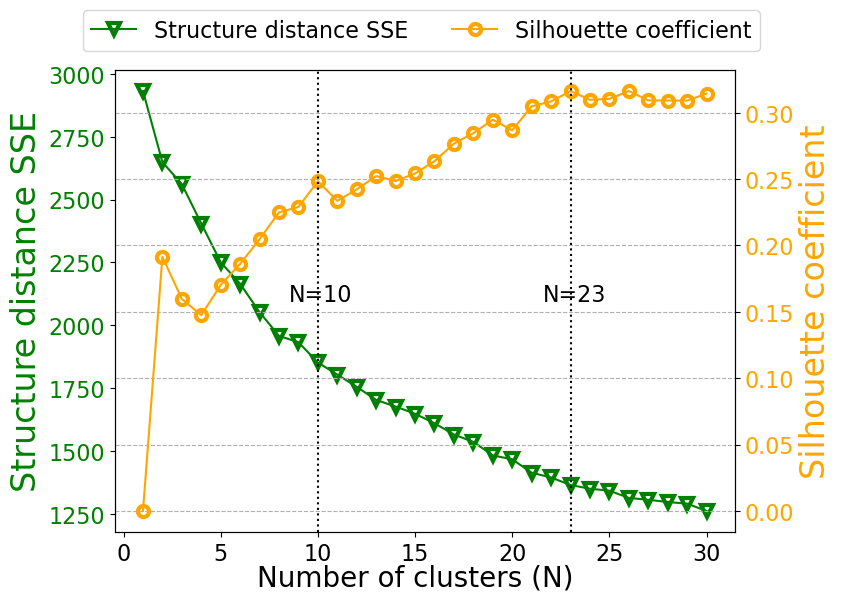

In [14]:
fig, ax1 = plt.subplots(figsize=(8,6))
xx = range(1, 31)
ax2 = ax1.twinx()

line1, = ax1.plot(xx, SSE_struct, c='g', marker='v', mfc='None', mec='g', ms='8', mew=3, label="Structure distance SSE")
line2, = ax2.plot(xx, SilhouetteScore, c='orange', marker='o', mfc='None', mec='orange', ms=8, mew=3, label="Silhouette coefficient")

ax1.set_ylabel('Structure distance SSE', color='green', fontsize=24)
ax2.set_ylabel('Silhouette coefficient', color='orange', fontsize=24)

ax1.tick_params(axis='y', labelcolor='green', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelcolor='orange', labelsize=16)

fig.supxlabel('Number of clusters (N)', fontsize=20)
plt.axvline(x=10, c='k', linestyle=':')
plt.annotate('N=10', xy=(0.28, 0.5), xycoords='axes fraction', fontsize=16)
plt.axvline(x=23, c='k', linestyle=':')
plt.annotate('N=23', xy=(0.69, 0.5), xycoords='axes fraction', fontsize=16)

plt.grid(linestyle='--')

fig.legend([line1, line2], ["Structure distance SSE", "Silhouette coefficient"], prop={"size":16}, loc=9, ncol=2)

plt.show()

### Final Clustering of all populated HLA class I alleles in sub-supertype level

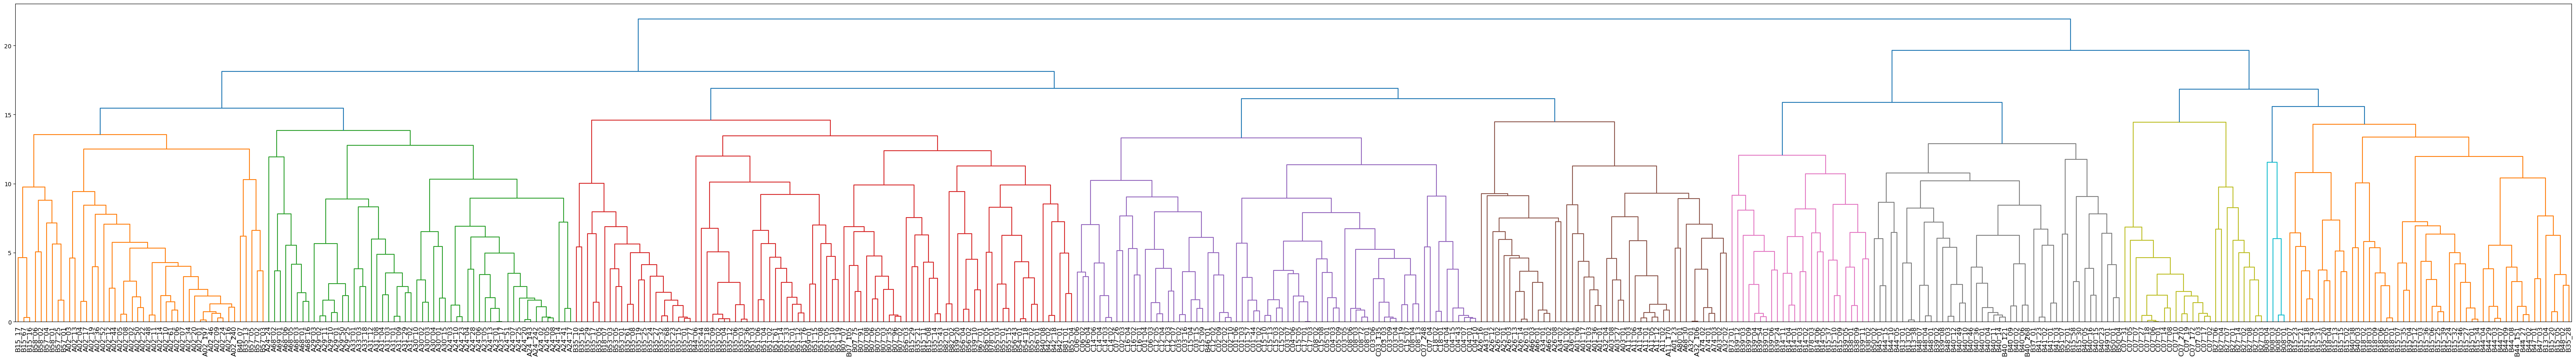

In [15]:
cluster, order = hierarchical_cluster(Mat, N=23, L='complete', color_threshold=None, plot_dendro=True, outtree=False)

name_order = Mat.index[order].to_list()
group_dict = cluster.to_dict()

full_CG_order = []
temp_group = None
last_group = -1
for name in name_order:
    if group_dict[name] != last_group:
        temp_group = []
        full_CG_order.append(temp_group)

    temp_group.append(name)
    last_group = group_dict[name]

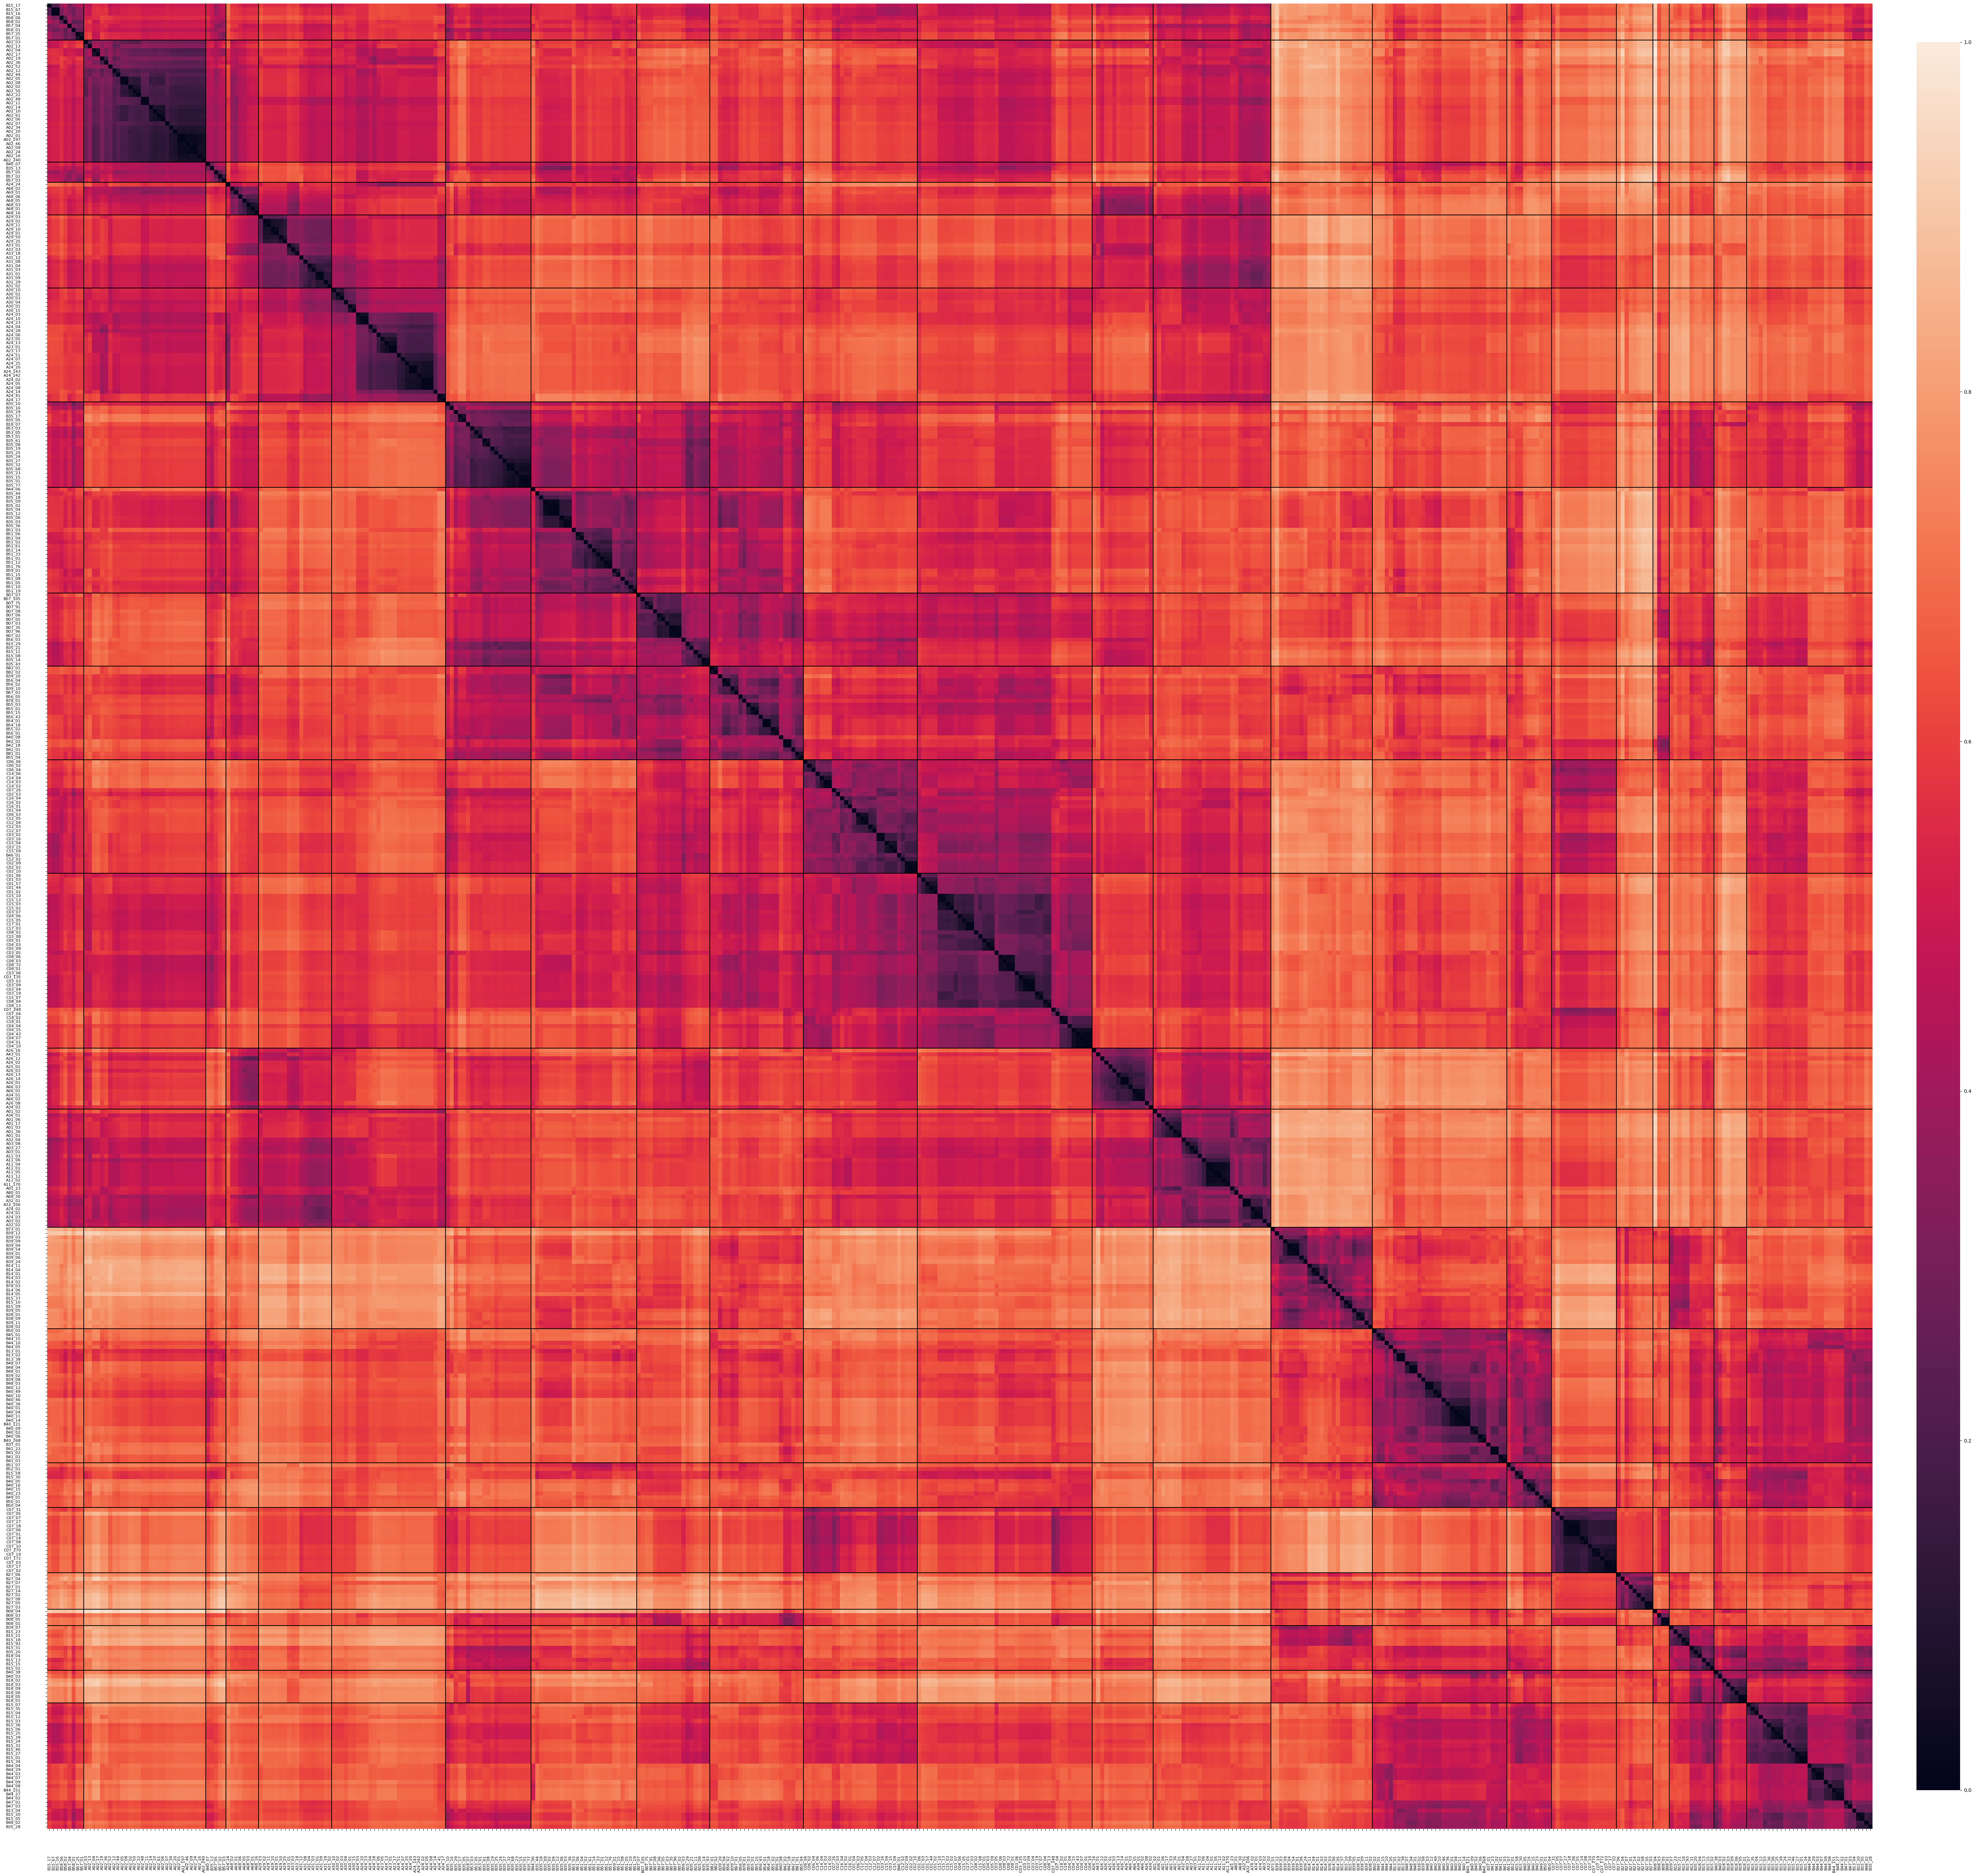

In [16]:
dist_heatmap(Mat, order=full_CG_order, size=(80,80), line=True, shrink=0.8, aspect=40, pad=0.02, label=True)